In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

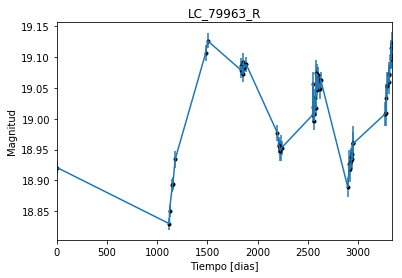

In [2]:
data = np.genfromtxt('LC_79963_R.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_79963_R')
plt.savefig("LC_79963_R.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

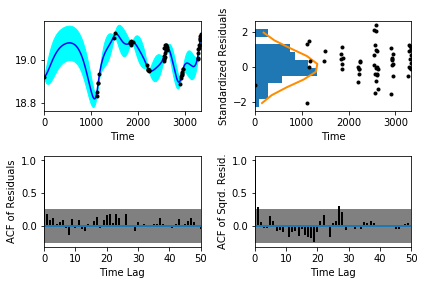

In [5]:
sample.assess_fit()

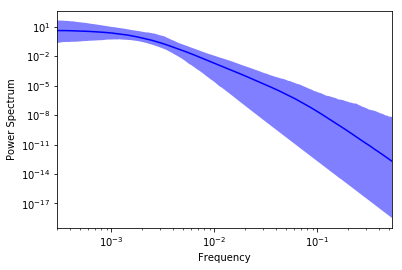

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

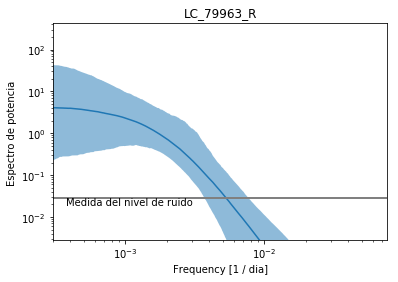

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_79963_R')
plt.savefig("Medida del nivel de ruido_R.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_79963_R')

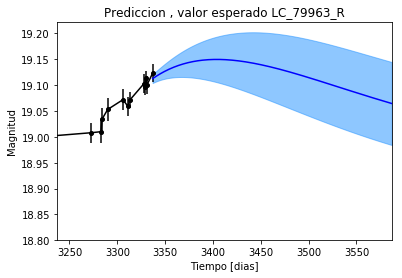

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_79963_R')

Text(0.5,1,'Prediccion, Caminos simulados_LC_79963_R')

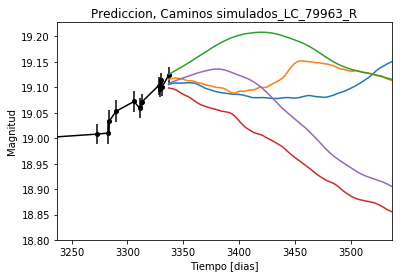

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados_LC_79963_R')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


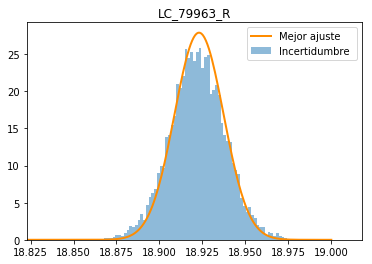

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_79963_R')
plt.savefig("Mejor_ajuste_LC_79963_R.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_79963_R')

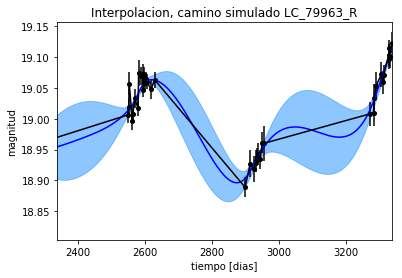

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_79963_R')

Text(0.5,1,'Interpolacion, camino simulado LC_79963_R')

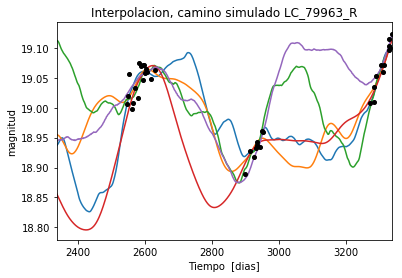

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_79963_R')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 463.352679971
Median: 0.00508915744318
Standard deviation: 0.192218836702
68% credibility interval: [ 0.00072072  0.14131876]
95% credibility interval: [  3.40165871e-04   7.94530937e-01]
99% credibility interval: [  3.08257363e-04   9.95212004e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 642.513504781
Median: 0.00157387804512
Standard deviation: 0.0792941022166
68% credibility interval: [ 0.00051935  0.01270168]
95% credibility interval: [ 0.00032301  0.20100649]
99% credibility interval: [  3.03020246e-04   5.87171249e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 868.244630598
Median: 0.0103992660127
Standard

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 577.354268803
Median: 165.788756899
Standard deviation: 1.75536287859
68% credibility interval: [ 163.80883381  167.04013658]
95% credibility interval: [ 161.04447094  167.92039375]
99% credibility interval: [ 159.07743364  168.35944925]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 572.302406297
Median: 0.544039010975
Standard deviation: 2.06281476609
68% credibility interval: [ 0.05319464  3.55459302]
95% credibility interval: [ 0.015636    6.69398666]
99% credibility interval: [ 0.01118654  9.20364623]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 1265.65905457
Median: 0.145732969927
Standard deviation: 7.80965694989
68% credibility interval: [ 0.0050351   4.32193613]
95% credibility interval: [  5.86650907e-0

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 11589.1817859
Median: 7.50881397777e-27
Standard deviation: 5.3679508549e+23
68% credibility interval: [  2.33952151e-86   7.08963350e-01]
95% credibility interval: [  1.44912630e-124   2.41324982e+022]
99% credibility interval: [  5.86723096e-139   4.72309667e+023]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 2519.76996358
Median: 19.0019794979
Standard deviation: 0.0578411523117
68% credibility interval: [ 18.95725072  19.0409255 ]
95% credibility interval: [ 18.87847638  19.11209508]
99% credibility interval: [ 18.81009761  19.20428655]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 849.94413748
Median: 0.00203061552389
Standard deviation: 0.219869584837
68% credibility interval: [ 0.          0.22759665]
95% credibility interval: [ 0.          0.84540236]
99% credibility interval: [ 0.          1.01805291]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 849.94413748
Median: 0.00203061552389
Standard deviation: 0.219869584837
68% credibility interval: [ 0.          0.22759665]
95% credibility interval: [ 0.          0.84540236]
99% credibility interval: [ 0.          1.01805291]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 853.691643822
Median: 0.0
Standard deviation: 0.000696799259218
68% cr

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 577.354268803
Median: 165.788756899
Standard deviation: 1.75536287859
68% credibility interval: [ 163.80883381  167.04013658]
95% credibility interval: [ 161.04447094  167.92039375]
99% credibility interval: [ 159.07743364  168.35944925]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 2562.40339959
Median: 0.0127457578439
Standard deviation: 0.0242834596286
68% credibility interval: [ 0.00712954  0.02600286]
95% credibility interval: [ 0.00452426  0.07297691]
99% credibility interval: [ 0.00356974  0.1775244 ]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 1999.34499407
Median: 0.894293620651
Standard deviation: 0.13703835926
68% credibility interval: [ 0.77384878  1.03811966]
95% credibility interval: [ 0.67060565  1.21086596]
99% credibility interval: [ 0.6185096   1.33177015]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 5644.85532118
Median: 2.68846162643e-05
Standard deviation: 0.00547048859351
68% credibility interval: [  7.85962928e-08   9.14608751e-04]
95% credibility interval: [  2.81408867e-27   6.52400631e-03]
99% credibility interval: [  1.78863760e-28   1.38539558e-02]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 463.352679971
Median: (-0.0319761192729+0j)
Standard deviation: 1.83497751622
68% credibility interval: [-0.88793194-4.35806436j -0.00452841-0.06081144j]
95% credibility interval: [ -4.99218511e+00+0.j          -2.13732520e-03-0.00945997j]
99% credibility interval: [ -6.25310144e+00+0.j          -1.93683813e-03-0.01294791j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 642.513504781
Median: (-0.0098889674084+0.00643039218034j)
Standard deviation: 1.46857530092
68% credibility interval: [-0.07980699+0.j         -0.00326314+0.02298501j]
95% credibility interval: [-1.26296100+5.04806638j -0.00202953+1.3960108j ]
99% credibility interval: [ -3.68930576e+00 +3.90573178e+00j  -1.90393236e-03 +6.73630364e-04j]
Posterior sum